<a href="https://colab.research.google.com/github/LEESUAJE1978/deeplearning_sejong/blob/master/ex09_optimazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.텐서플로우 버전

In [1]:
#0. 텐서플로우 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass

TensorFlow 1.x selected.


1. 패키지 불러오기

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
tf.set_random_seed(777) #for reproducibility(재생산성)

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f37434691d0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f37365007b8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3736500828>)

In [7]:
nb_classes = 10

In [8]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [9]:
W= tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))


In [10]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

In [11]:
cost = tf.reduce_mean(-tf.reduce_sum(Y *tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)

In [12]:
is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [13]:
num_epochs = 15 #epoch는 각 데이터의 size가 100인 batch가 들어간 550의 iteration으로 나누어집니다.
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size) 

In [14]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      _, cost_val = sess.run([train, cost], feed_dict = {X:batch_xs, Y: batch_ys})
      avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost : {:.9f}".format(epoch+1, avg_cost))

  print("Learning Finished")

  print(
    "Accuracy:",
    accuracy.eval(
        session = sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}
    ),
)


Epoch: 0001, Cost : 2.826302671
Epoch: 0002, Cost : 1.061668953
Epoch: 0003, Cost : 0.838061300
Epoch: 0004, Cost : 0.733232729
Epoch: 0005, Cost : 0.669279874
Epoch: 0006, Cost : 0.624611825
Epoch: 0007, Cost : 0.591160346
Epoch: 0008, Cost : 0.563868980
Epoch: 0009, Cost : 0.541745169
Epoch: 0010, Cost : 0.522673575
Epoch: 0011, Cost : 0.506782328
Epoch: 0012, Cost : 0.492447637
Epoch: 0013, Cost : 0.479955836
Epoch: 0014, Cost : 0.468893668
Epoch: 0015, Cost : 0.458703486
Learning Finished
Accuracy: 0.8951


Label: [8]
prediction:  [1]


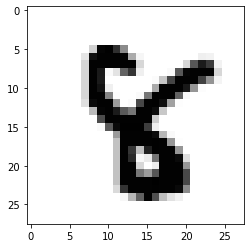

In [15]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
 
  r = random.randint(0, mnist.test.num_examples -1)
  print("Label:", sess.run(tf.argmax(mnist.test.labels[r : r+1],1)))
  print(
      "prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r :r+1]}),
)

plt.imshow(
    mnist.test.images[r :r + 1].reshape(28,28),
    cmap = "Greys",
    interpolation = 'nearest'
)

plt.show()

드롭아웃(Drop out)

In [16]:
!pip uninstall mxnet && pip install mxnet-cu100

     |████████████████████████████████| 827.8MB 17kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
참고 : https://pinkwink.kr/1121

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


참고:
 https://buomsoo-kim.github.io/keras/2018/04/24/Easy-deep-learning-with-Keras-5.md/

https://ko.d2l.ai/chapter_deep-learning-basics/dropout.html#%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83(dropout)-%EC%8B%A4%EC%A0%9C-%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0

https://buomsoo-kim.github.io/keras/2018/04/24/Easy-deep-learning-with-Keras-5.md/